# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Display the data table for preview
combined_data = pd.merge(study_results, mouse_metadata, how='inner', on = ["Mouse ID", "Mouse ID"])

combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique
mouse_count()

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
u_combined_data = combined_data.drop_duplicates
u_combined_data
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicates = u_combined_data.duplicated(subset=["Mouse ID", "Timepoint"])

<bound method DataFrame.drop_duplicates of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        b128          5           45.651331                 0    Capomulin   
2        b128         10           43.270852                 0    Capomulin   
3        b128         15           43.784893                 0    Capomulin   
4        b128         20           42.731552                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1888     m601         25           33.118756                 1    Capomulin   
1889     m601         30           31.758275                 1    Capomulin   
1890     m601         35           30.834357                 1    Capomulin   
1891     m601         40           31.378045                 1    Capomulin   
1892     m601         45           28.430964                 1    Capomulin   

        

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
unique_mouse = combined_data["Mouse ID"].unique
unique_mouse()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_cleaned = combined_data.drop_duplicates(subset=['Mouse ID'])
combined_data_cleaned

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = combined_data["Mouse ID"].nunique
cleaned_mice_count()

249

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tvolume_mean = combined_data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tvolume_median = combined_data_cleaned.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tvolume_var = combined_data_cleaned.groupby([ 'Drug Regimen'])['Tumor Volume (mm3)'].var()
tvolume_std = combined_data_cleaned.groupby([ 'Drug Regimen'])['Tumor Volume (mm3)'].std()
tvolume_sem = combined_data_cleaned.groupby([ 'Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
results_df = pd.DataFrame({'Mean Tumor Volume': tvolume_mean,
                          'Median Tumor Volume': tvolume_median,
                          'Tumor Volume Variance': tvolume_var,
                          'Tumor Volume Std. Dev.': tvolume_std,
                          'Tumor Volume Std. Err.': tvolume_sem})
print(results_df)


              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin                  45.0                 45.0                    0.0   
Ceftamin                   45.0                 45.0                    0.0   
Infubinol                  45.0                 45.0                    0.0   
Ketapril                   45.0                 45.0                    0.0   
Naftisol                   45.0                 45.0                    0.0   
Placebo                    45.0                 45.0                    0.0   
Propriva                   45.0                 45.0                    0.0   
Ramicane                   45.0                 45.0                    0.0   
Stelasyn                   45.0                 45.0                    0.0   
Zoniferol                  45.0                 45.0                    0.0   

              Tumor Volume Std. Dev.  Tumor Volume 

In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
adv_results = pd.DataFrame({'Mean': tvolume_mean,
                          'Median': tvolume_median,
                          'Var': tvolume_var,
                          'Std': tvolume_std,
                          'Sem': tvolume_sem})
# Using the aggregation method, produce the same summary statistics in a single line
print(adv_results)

              Mean  Median  Var  Std  Sem
Drug Regimen                             
Capomulin     45.0    45.0  0.0  0.0  0.0
Ceftamin      45.0    45.0  0.0  0.0  0.0
Infubinol     45.0    45.0  0.0  0.0  0.0
Ketapril      45.0    45.0  0.0  0.0  0.0
Naftisol      45.0    45.0  0.0  0.0  0.0
Placebo       45.0    45.0  0.0  0.0  0.0
Propriva      45.0    45.0  0.0  0.0  0.0
Ramicane      45.0    45.0  0.0  0.0  0.0
Stelasyn      45.0    45.0  0.0  0.0  0.0
Zoniferol     45.0    45.0  0.0  0.0  0.0


## Bar and Pie Charts

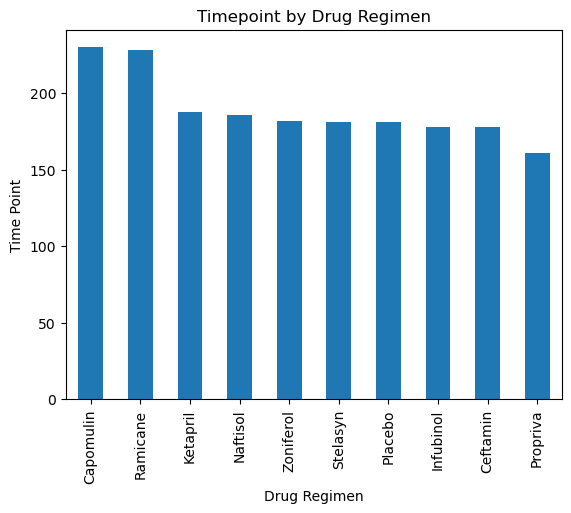

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_drug = combined_data['Drug Regimen'].value_counts()

count_per_drug.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Time Point')
plt.title('Timepoint by Drug Regimen')
plt.show()

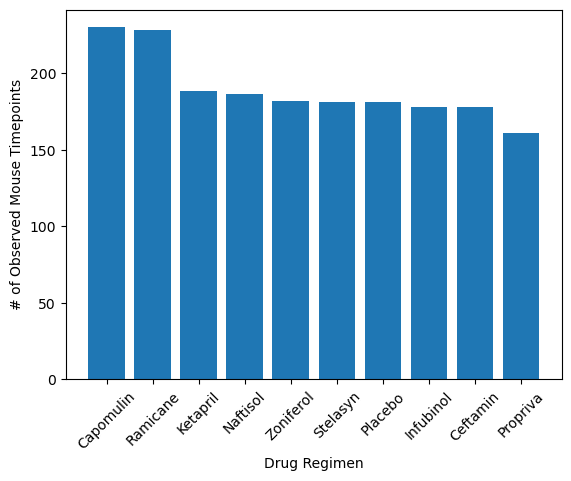

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count_per_drug =combined_data['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.bar(count_per_drug.index, count_per_drug.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

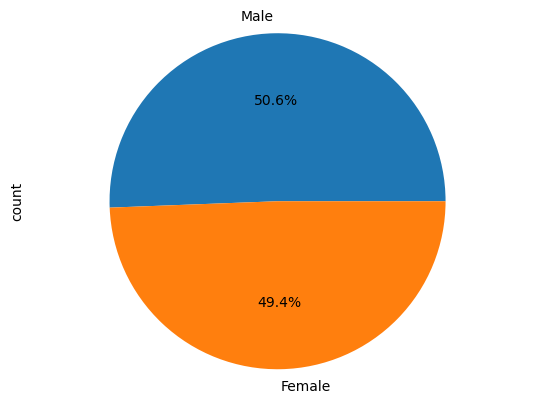

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distr = combined_data['Sex'].value_counts()

sex_distr.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

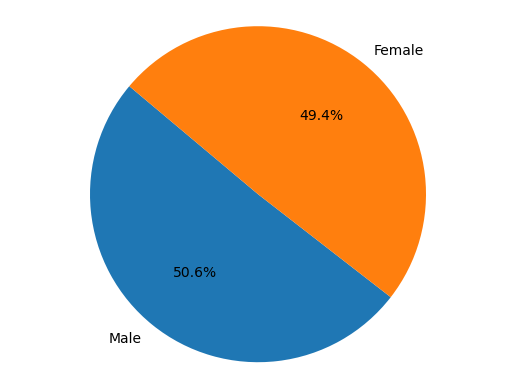

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distr = combined_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.pie(sex_distr, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
df_filtered = combined_data[combined_data['Drug Regimen'].isin(treatment_regimens)]

# Step 2: Find the final timepoint for each mouse
final_timepoints = df_filtered.groupby('Mouse ID')['Timepoint'].max()

# Step 3: Get the final tumor volume for each mouse
final_tumor_volumes = df_filtered.loc[df_filtered.set_index(['Mouse ID', 'Timepoint']).index.isin(final_timepoints.items()), 'Tumor Volume (mm3)']

# Resetting the index for final_tumor_volumes
final_tumor_volumes = final_tumor_volumes.reset_index()

# Display the final tumor volumes for each mouse
print(final_tumor_volumes)
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


TypeError: object of type 'zip' has no len()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


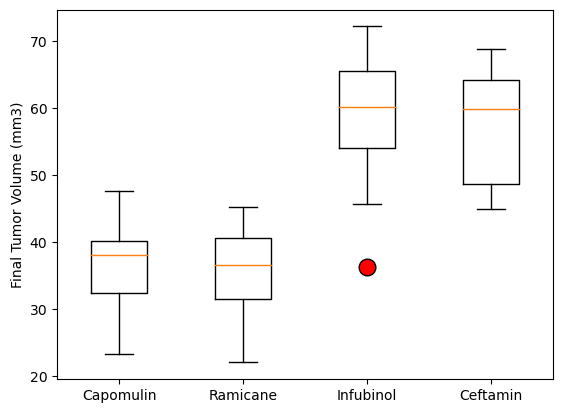

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

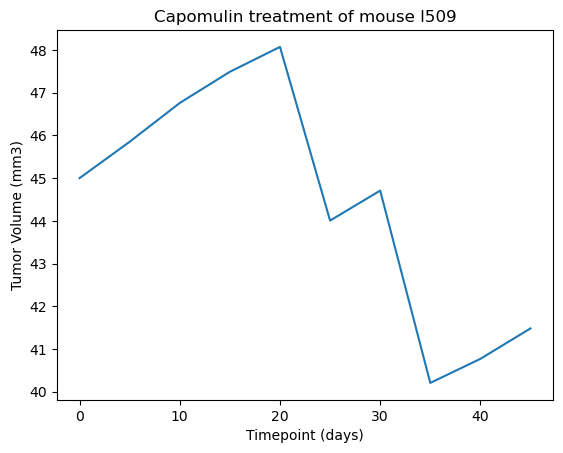

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


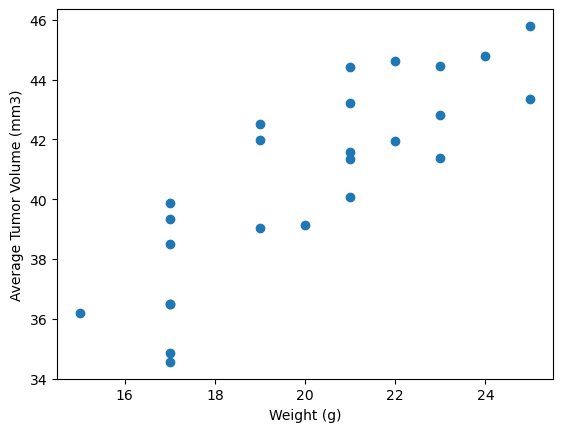

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


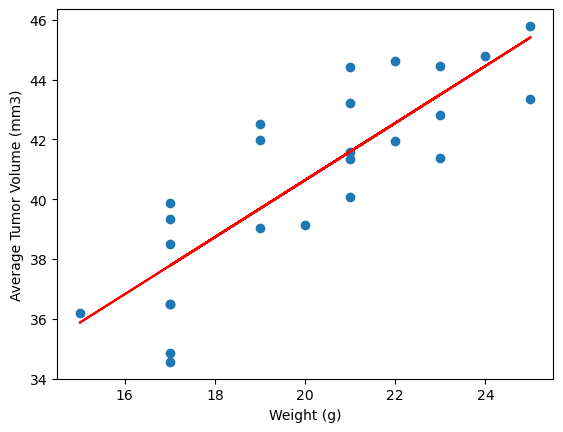

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
